In [4]:
#!pip install ibm_db
import ibm_db

In [1]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "kqk00385"        # e.g. "abc12345"
dsn_pwd = "3q9wc5b^fpj4zwm4"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [2]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=kqk00385;PWD=3q9wc5b^fpj4zwm4;


In [5]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter 
#Create database connection 

try:
    conn = ibm_db.connect(dsn, "", "") 
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname) 

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() ) 
 

Connected to database:  BLUDB as user:  kqk00385 on host:  dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net


In [6]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME) 
print ("DBMS_VER:  ", server.DBMS_VER) 
print ("DB_NAME:   ", server.DB_NAME) 

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [7]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.01.0405
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [8]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR" 

#Now execute the drop statment 
dropStmt = ibm_db.exec_immediate(conn, dropQuery) 

In [9]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(id INTEGER PRIMARY KEY NOT NULL, fname VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn,createQuery)

In [10]:
#insert query

insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [11]:

insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [12]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)
#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [13]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
selectStmt = ibm_db.exec_immediate(conn, selectQuery)
while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 1  FNAME: Rav
 ID: 2  FNAME: Raul
 ID: 3  FNAME: Hima


In [14]:
#Update Query

updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)


# Retrieve data into pandas 


In [15]:
import pandas
import ibm_db_dbi

In [16]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [17]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.LNAME[0]

'Ahuja'

In [18]:
#print the entire data frame
pdf

ID FNAME      LNAME       CITY CCODE
0   1   Rav      Ahuja  MOOSETOWN    CA
1   2  Raul      Chong    Markham    CA
2   3  Hima  Vasudevan    Chicago    US

# SQL MAGIC 



In [72]:
!pip3 install ipython-sql

  Using cached ipython_sql-0.4.0-py3-none-any.whl (19 kB)
  Using cached prettytable-0.7.2.tar.bz2 (21 kB)
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13704 sha256=962b30730b04632cc6b81ef42e29961dc9c8bea1c9d89d52063559b563cc582f
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\46\60\6c\bb25d05df22906786206e901e9354bb3061061191116768bee
Successfully built prettytable


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
%load_ext sql

In [29]:
!pip install ibm_db_sa

  Created wheel for ibm-db-sa: filename=ibm_db_sa-0.3.5-py3-none-any.whl size=28003 sha256=28a799c40e4a43aefb44380ad7b4cfaeac04cbf83fced4a3b5ba07d60f200b5c
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\41\ef\bb\8751fff913f21f03cc348c9cb7ff841eb25bbd844bd485d36d
Successfully built ibm-db-sa


In [2]:
%sql ibm_db_sa://kqk00385:3q9wc5b%5Efpj4zwm4@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB

In [3]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
    country VARCHAR(50),
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://kqk00385:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.
99 rows affected.


[]

In [10]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://kqk00385:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


[('Canada', 'Cristionna', 'Wadmore', 46),
 ('Canada', 'Wilhelm', 'Deeprose', 54),
 ('Canada', 'Carma', 'Schule', 49)]

In [11]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://kqk00385:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


[('Canada', 'Cristionna', 'Wadmore', 46),
 ('Canada', 'Wilhelm', 'Deeprose', 54),
 ('Canada', 'Carma', 'Schule', 49)]

In [16]:
test_score_distribution = %sql SELECT test_score , count(*)  from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://kqk00385:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


[(38, Decimal('2')),
 (40, Decimal('1')),
 (43, Decimal('2')),
 (44, Decimal('2')),
 (45, Decimal('8')),
 (46, Decimal('7')),
 (47, Decimal('4')),
 (48, Decimal('14')),
 (49, Decimal('8')),
 (50, Decimal('10')),
 (51, Decimal('8')),
 (52, Decimal('8')),
 (53, Decimal('8')),
 (54, Decimal('5')),
 (55, Decimal('4')),
 (56, Decimal('1')),
 (57, Decimal('2')),
 (58, Decimal('4')),
 (60, Decimal('1'))]

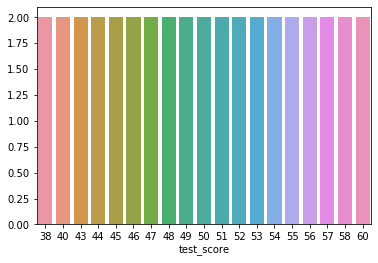

In [18]:

dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn
import seaborn

plot = seaborn.barplot(x='test_score',y=2, data=dataframe)

In [19]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    

 * ibm_db_sa://kqk00385:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


[('United States', 'Marshall', 'Bernadot', 54),
 ('Ghana', 'Celinda', 'Malkin', 51),
 ('Ukraine', 'Guillermo', 'Furze', 53),
 ('Greece', 'Aharon', 'Tunnow', 48),
 ('Russia', 'Bail', 'Goodwin', 46),
 ('Poland', 'Cole', 'Winteringham', 49),
 ('Sweden', 'Emlyn', 'Erricker', 55),
 ('Russia', 'Cathee', 'Sivewright', 49),
 ('China', 'Barny', 'Ingerson', 57),
 ('Uganda', 'Sharla', 'Papaccio', 55),
 ('China', 'Stella', 'Youens', 51),
 ('Poland', 'Julio', 'Buesden', 48),
 ('United States', 'Tiffie', 'Cosely', 58),
 ('Poland', 'Auroora', 'Stiffell', 45),
 ('China', 'Clarita', 'Huet', 52),
 ('Poland', 'Shannon', 'Goulden', 45),
 ('Philippines', 'Emylee', 'Privost', 50),
 ('France', 'Madelina', 'Burk', 49),
 ('China', 'Saunderson', 'Root', 58),
 ('Indonesia', 'Bo', 'Waring', 55),
 ('China', 'Hollis', 'Domotor', 45),
 ('Russia', 'Robbie', 'Collip', 46),
 ('Philippines', 'Davon', 'Donisi', 46),
 ('China', 'Cristabel', 'Radeliffe', 48),
 ('China', 'Wallis', 'Bartleet', 58),
 ('Moldova', 'Arleen', 'Stailey', 38),
 ('Ireland', 'Mendel', 'Grumble', 58),
 ('China', 'Sallyann', 'Exley', 51),
 ('Mexico', 'Kain', 'Swaite', 46),
 ('Indonesia', 'Alonso', 'Bulteel', 45),
 ('Armenia', 'Anatol', 'Tankus', 51),
 ('Indonesia', 'Coralyn', 'Dawkins', 48),
 ('China', 'Deanne', 'Edwinson', 45),
 ('China', 'Georgiana', 'Epple', 51),
 ('Portugal', 'Bartlet', 'Breese', 56),
 ('Azerbaijan', 'Idalina', 'Lukash', 50),
 ('France', 'Livvie', 'Flory', 54),
 ('Malaysia', 'Nonie', 'Borit', 48),
 ('Indonesia', 'Clio', 'Mugg', 47),
 ('Brazil', 'Westley', 'Measor', 48),
 ('Philippines', 'Katrinka', 'Sibbert', 51),
 ('Poland', 'Valentia', 'Mounch', 50),
 ('Norway', 'Sheilah', 'Hedditch', 53),
 ('Papua New Guinea', 'Itch', 'Jubb', 50),
 ('Latvia', 'Stesha', 'Garnson', 53),
 ('Canada', 'Cristionna', 'Wadmore', 46),
 ('China', 'Lianna', 'Gatward', 43),
 ('Guatemala', 'Tanney', 'Vials', 48),
 ('France', 'Alma', 'Zavittieri', 44),
 ('China', 'Alvira', 'Tamas', 50),
 ('United States', 'Shanon', 'Peres', 45),
 ('Sweden', 'Maisey', 'Lynas', 53),
 ('Indonesia', 'Kip', 'Hothersall', 46),
 ('China', 'Cash', 'Landis', 48),
 ('Panama', 'Kennith', 'Digance', 45),
 ('China', 'Ulberto', 'Riggeard', 48),
 ('Switzerland', 'Judy', 'Gilligan', 49),
 ('Philippines', 'Tod', 'Trevaskus', 52),
 ('Brazil', 'Herold', 'Heggs', 44),
 ('Latvia', 'Verney', 'Note', 50),
 ('Poland', 'Temp', 'Ribey', 50),
 ('China', 'Conroy', 'Egdal', 48),
 ('Japan', 'Gabie', 'Alessandone', 47),
 ('Ukraine', 'Devlen', 'Chaperlin', 54),
 ('France', 'Babbette', 'Turner', 51),
 ('Czech Republic', 'Virgil', 'Scotney', 52),
 ('Tajikistan', 'Zorina', 'Bedow', 49),
 ('China', 'Aidan', 'Rudeyeard', 50),
 ('Ireland', 'Saunder', 'MacLice', 48),
 ('France', 'Waly', 'Brunstan', 53),
 ('China', 'Gisele', 'Enns', 52),
 ('Peru', 'Mina', 'Winchester', 48),
 ('Japan', 'Torie', 'MacShirrie', 50),
 ('Russia', 'Benjamen', 'Kenford', 51),
 ('China', 'Etan', 'Burn', 53),
 ('Russia', 'Merralee', 'Chaperlin', 38),
 ('Indonesia', 'Lanny', 'Malam', 49),
 ('Canada', 'Wilhelm', 'Deeprose', 54),
 ('Czech Republic', 'Lari', 'Hillhouse', 48),
 ('China', 'Ossie', 'Woodley', 52),
 ('Macedonia', 'April', 'Tyer', 50),
 ('Vietnam', 'Madelon', 'Dansey', 53),
 ('Ukraine', 'Korella', 'McNamee', 52),
 ('Jamaica', 'Linnea', 'Cannam', 43),
 ('China', 'Mart', 'Coling', 52),
 ('Indonesia', 'Marna', 'Causbey', 47),
 ('China', 'Berni', 'Daintier', 55),
 ('Poland', 'Cynthia', 'Hassell', 49),
 ('Canada', 'Carma', 'Schule', 49),
 ('Indonesia', 'Malia', 'Blight', 48),
 ('China', 'Paulo', 'Seivertsen', 47),
 ('Niger', 'Kaylee', 'Hearley', 54),
 ('Japan', 'Maure', 'Jandak', 46),
 ('Argentina', 'Foss', 'Feavers', 45),
 ('Venezuela', 'Ron', 'Leggitt', 60),
 ('Russia', 'Flint', 'Gokes', 40),
 ('China', 'Linet', 'Conelly', 52),
 ('Philippines', 'Nikolas', 'Birtwell', 57),
 ('Australia', 'Eduard', 'Leipelt', 53)]

# Real World Data 


In [ ]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA = 'KQK00385'

#or

%sql select * from SYSCAT.TABLES where TABNAME = 'SCHOOLS'

#or

%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES \
      where TABSCHEMA not in ('SYSIBM', 'SYSCAT', 'SYSSTAT', 'SYSIBMADM', 'SYSTOOLS', 'SYSPUBLIC')


In [1]:
# Show column

%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'


UsageError: Line magic function `%sql` not found.
